# Continut
## [1. Importul datelor si explorarea acestora](#import)
## [2. Crearea seturilor](#set)
## [3. Crearea modelului AdaBoostClassifier cu un singur stump](#model)
## [4. Determinarea caracterisiticii celei mai importante](#important)
## [5. Selectarea numarului optim de stump-uri](#stump)
## [6. Determinarea caracteristicii celei mai importante pentru numar optim de stump-uri](#optim)


<a id='import'></a>
# 1. Importul datelor si explorarea acestora

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importul datelor
df = pd.read_csv("mushrooms.csv")

Sursa datelor: https://archive.ics.uci.edu/ml/datasets/Mushroom

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
# vizualizarea informației despre date df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
# verificarea prezentei lipsurilor df.isna().sum()
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
# vizualizarea informatiei statistice despre date df.describe().transpose()
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


<AxesSubplot:xlabel='class', ylabel='count'>

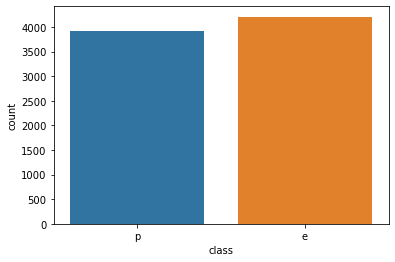

In [7]:
# determinarea numărului de valori pentru clasele label sns.countplot(data=df,x=col_label)
sns.countplot(data=df,x='class')

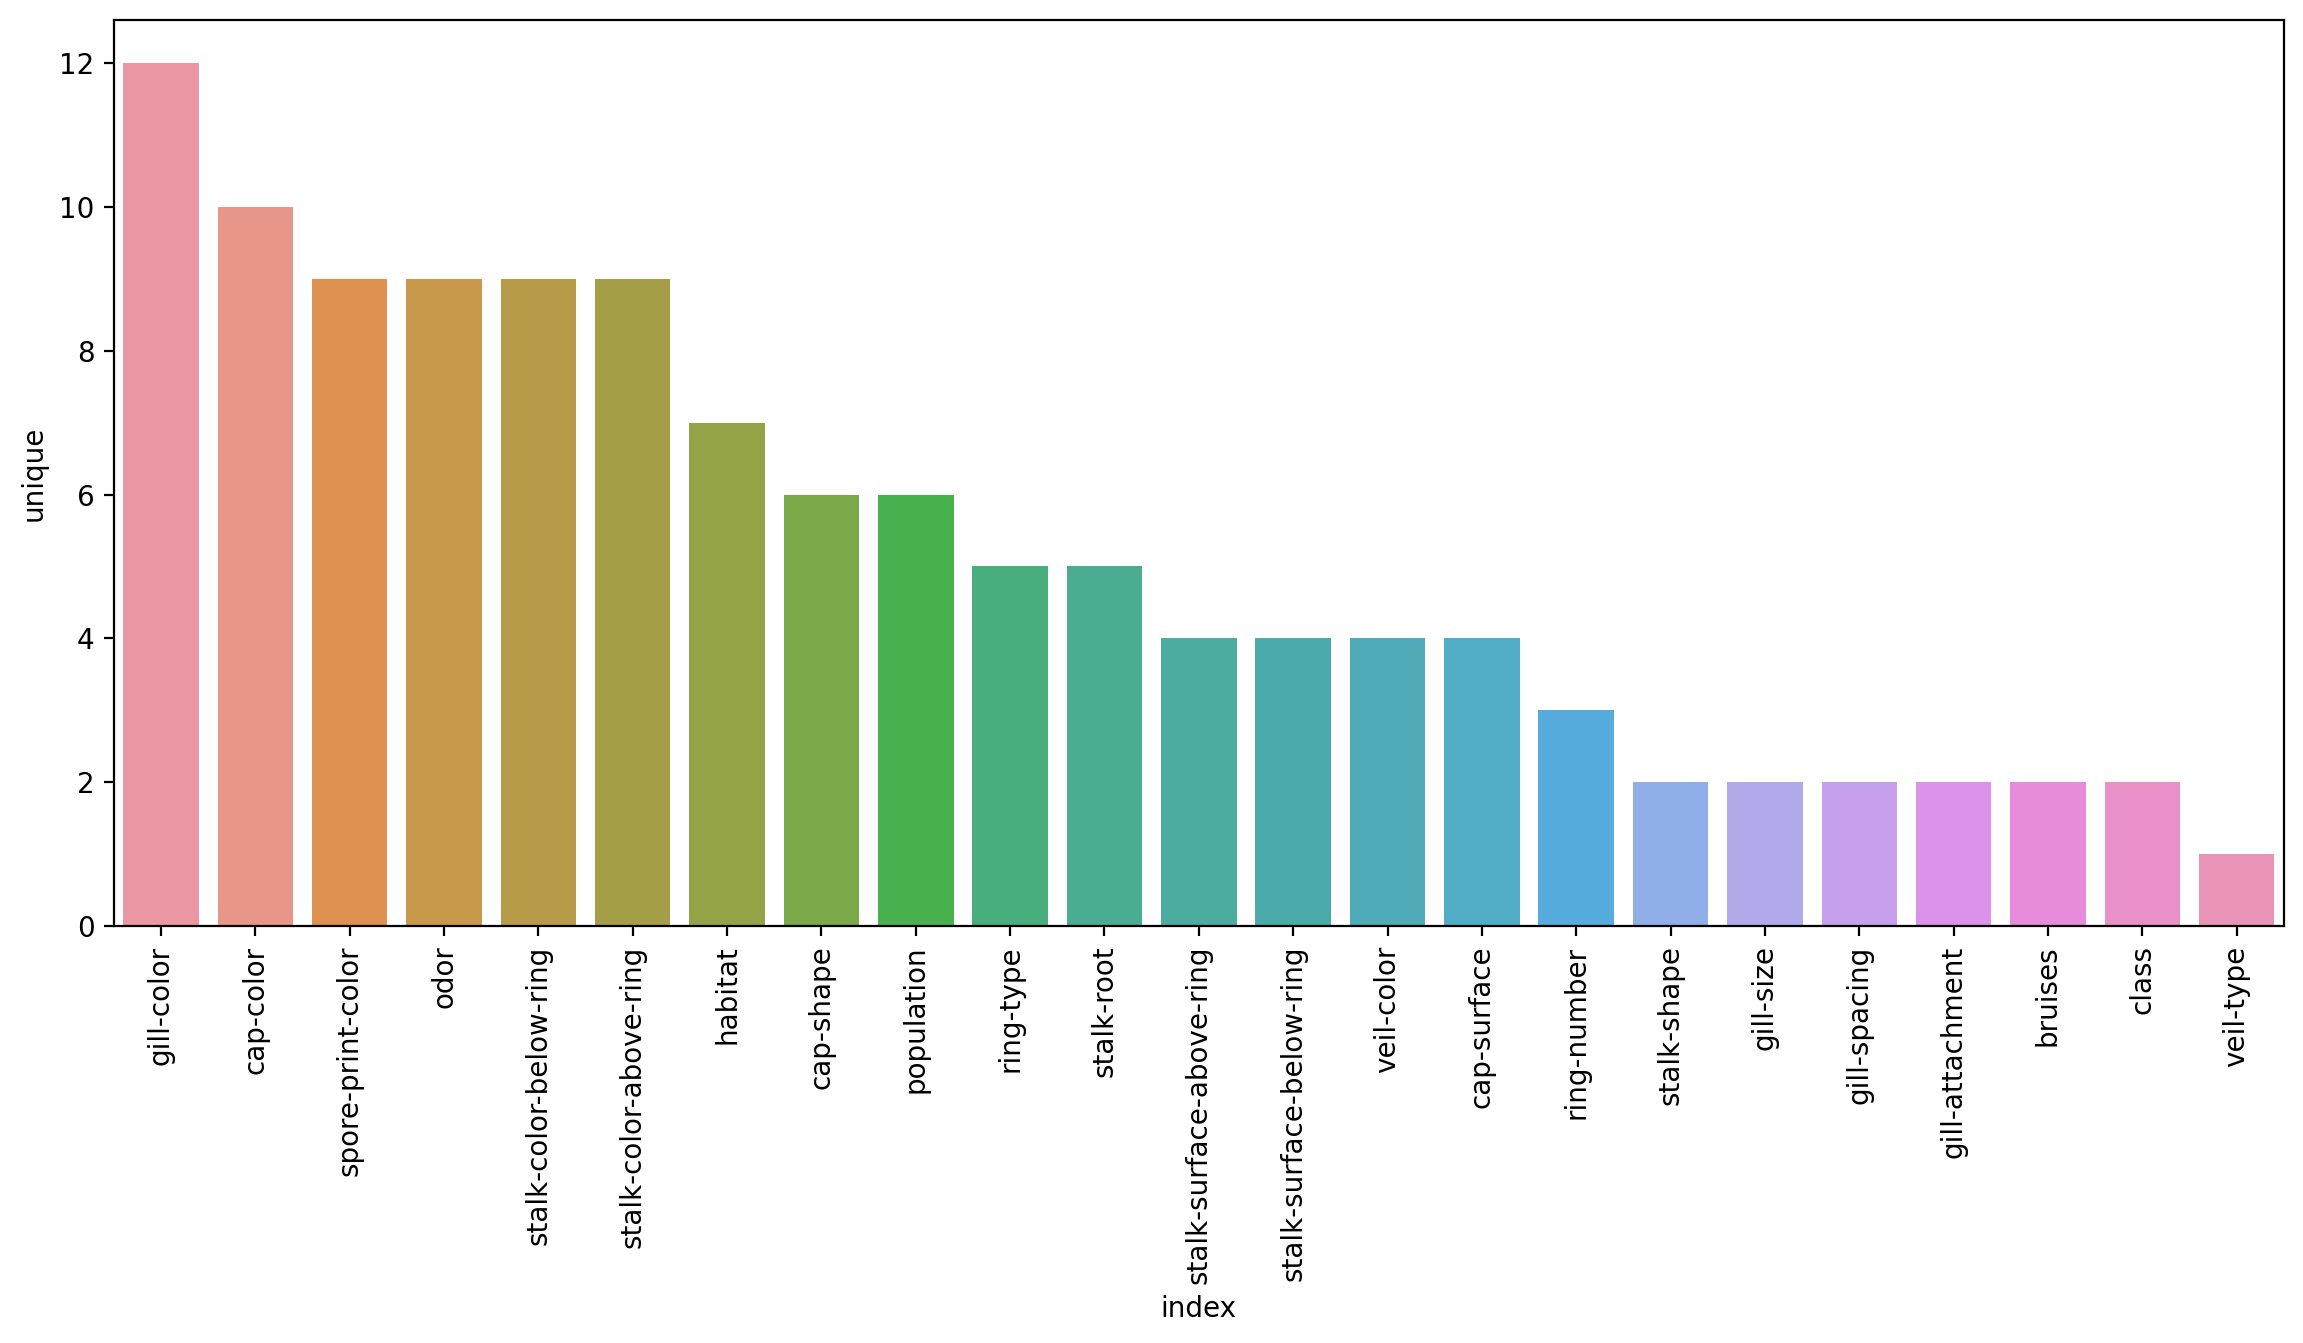

In [12]:
# afișarea grafica a numărului de valori unice pe categorie 
# sns.barplot(data=df.describe().transpose().reset_index().sort_values('unique'),x='index',y='unique')
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df.describe().transpose().reset_index().sort_values('unique', ascending=False),x='index',y='unique')
plt.xticks(rotation=90);

<a id='set'></a>
# 2. Crearea seturilor

In [13]:
# crearea setului X  X=df.drop(col_label, axis=1)
X = df.drop('class',axis=1)

In [14]:
# transformarea datelor categoriale in numerice in setul X X = pd.get_dummies(X,drop_first=True)
X = pd.get_dummies(X,drop_first=True)

In [15]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [16]:
# crearea setului y y=df[col_label]
y = df['class']

In [17]:
#crearea seturilor de train si de test 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)

<a id='model'></a>
# 3. Crearea modelului AdaBoostClassifier cu un singur stump

In [18]:
# importul algoritmului AdaBoostClassifier from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [19]:
# crearea modelului AdaBoostClassifier cu un stump model = AdaBoostClassifier(n_estimators=1)
model = AdaBoostClassifier(n_estimators=1)

In [20]:
# ajustarea modelului pe datele de training model.fit(X_train, y_train)
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [22]:
# •realizarea predicției model.predict(X_test)
y_pred=model.predict(X_test)

In [23]:
# importul functiilor de evaluare
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [24]:
# determinarea acurateti modelului accuracy_score(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.8876127973748975

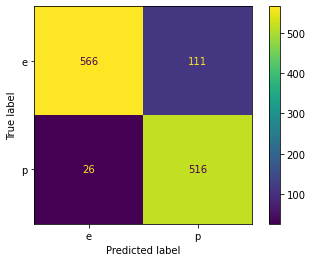

In [25]:
# vizualizarea grafica a confusion matrix a modelului plot_confusion_matrix(model,X_test,y_test)
plot_confusion_matrix(model,X_test,y_test)

In [26]:
# elaborarea classificasion report a modelului print(classification_report(y_test,y_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       0.96      0.84      0.89       677
           p       0.82      0.95      0.88       542

    accuracy                           0.89      1219
   macro avg       0.89      0.89      0.89      1219
weighted avg       0.90      0.89      0.89      1219



<a id='important'></a>
# 4. Determinarea caracteristicii celei mai importante

In [27]:
#determinarea importantei fiecărei caracteristici confrom modelului cu un stump model.feature_importances_
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
#determinarea  indexului caracteristicii celei mai importante model.feature_importances_.argmax()
index = model.feature_importances_.argmax()

In [29]:
# determinarea denumirii caracteristicii celei mai importante X.columns[model.feature_importances_.argmax()]
X.columns[index]

'odor_n'

Conform datelor transformate in valori numierice din valori categoriale cea mmai importanta caracteristica este 'odor_n' care corespunde valorii n din caracteristica 'odor' a setului de date initiale

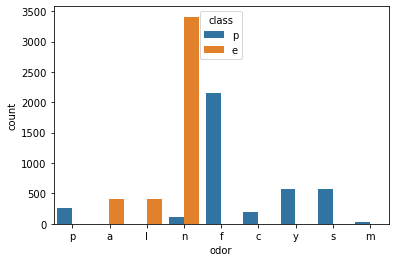

In [30]:
# vizualizarea numărului de valori ale clasei label in funcție de caracteristică cea mai importanta indatele initiale
# sns.countplot(data=df,x=col_importanta,hue=col_label)
sns.countplot(data=df,x='odor',hue='class');

Din acest grafic se observa ca daca mirosul ciupercii este a - de migdale, l - de anason sau n - lipseste cel mai probabil ca cipercile sunt comenstibile, in caz contrar acestea sunt otravitoare

<a id='stump'></a>
# 5. Selectarea numarului optim de stump-uri 

In [31]:
# determinarea numărului de coloane a setului X len(X.columns)
n_col=len(X.columns)

In [32]:
# elaborarea modelelor AdaBoostClassifier cu numarul de stump-uri din gama range(1,len(X.columns)+1) 
# și determinarea erorilor de predictie

lista_erori = []

for n in range(1,n_col+1):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    eroare = 1 - accuracy_score(y_test,y_pred)
    
    lista_erori.append(eroare)

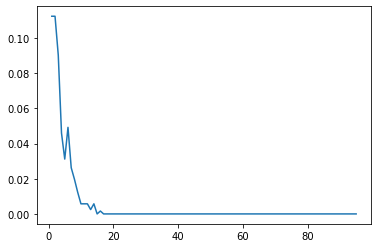

In [33]:
# afișarea grafică a dependenței valorii erorii de  numărul de stamp-uri plt.plot(range(1, len(X.columns)+1),lista_erori)
plt.plot(range(1,n_col+1),lista_erori);

Din graficul de mai sus se observa ca incepind cu valore 18 a numarului de stump-uri, eroare nu se mai reduce de aceea se condidera acesata valoare 18 ca valoare optima

<a id='optim'></a>
# 6. Determinarea caracteristicii celei mai importante pentru numar optim de stump-uri

In [34]:
# crearea modelului AdaBoostClassifier cu numar optim de stump-uri model = AdaBoostClassifier(n_estimators=n_optim)
model = AdaBoostClassifier(n_estimators=18)

In [35]:
# ajustarea modelului pe datele de training model.fit(X_train, y_train)
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=18)

In [36]:
# realizarea predicției model.predict(X_test)
y_pred = model.predict(X_test)

In [37]:
# determinarea acurateti modelului accuracy_score(y_test,y_pred)
accuracy_score(y_test,y_pred)

1.0

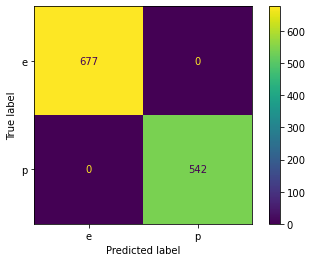

In [38]:
# vizualizarea grafica a confusion matrix a modelului plot_confusion_matrix(model,X_test,y_test)
plot_confusion_matrix(model,X_test,y_test)

In [39]:
# elaborarea classificasion report a modelului print(classification_report(y_test,y_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       677
           p       1.00      1.00      1.00       542

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [41]:
# determinarea importantei fiecărei caracteristici model.feature_importances_
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05555556, 0.        , 0.05555556, 0.05555556, 0.05555556,
       0.        , 0.        , 0.05555556, 0.05555556, 0.        ,
       0.        , 0.        , 0.05555556, 0.11111111, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05555556, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05555556, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05555556, 0.        , 0.        , 0.     

In [43]:
# structurarea importantei caracteristicilor intr-u df
caracteristici = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importanta'])

In [44]:
caracteristici

,Importanta
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
cap-shape_x,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [47]:
# selectarea doar a celor caracteristici cu importanta diferita de 0
caracter_import = caracteristici[caracteristici['Importanta']>0].sort_values("Importanta", ascending=False)

In [48]:
caracter_import

,Importanta
spore-print-color_w,0.166667
gill-size_n,0.111111
population_v,0.111111
cap-color_w,0.055556
bruises_t,0.055556
odor_c,0.055556
odor_f,0.055556
odor_n,0.055556
odor_p,0.055556
gill-spacing_w,0.055556


Din acest df se observa ca in cazul ami multor stump-uri caracteristica cu cea mai marea importanta se schimba si aceasta din cauza va algoritmul AdaBoost modifica ponderea caracteristicilor la fiecare stamp. Din cauza celor enumerate intotdeauna se va considera caracteristica cu cea mai mare importanta acea caracteristica deteminata la primul stump.